Step -1 : Business Problem Understanding

Step-2 : Data understanding (observations)
         - <font color = red> In your observation don't started to fix whatever the probelm in your data, all you need to just writedown whatever the things that is problem in the dataset and that you need to fix later in data preprocessing (this step will help you to udnerstand the data). </font> 


		- Understand the meaning of Column Names

		- identify the continous & discrete variables

		- understand each & every values clearly by applying descriptive statistics

			- For contionus variables (apply describe function)

			- For each discrete variable (apply value_counts)

		- Check how many columns have
			- wrong data type

			- wrong data

			- missing values

			- outliers
		
			- discrete 

			- skewness >1 or <-1

		- Complete EDA

			- apply various plots which are applicable for given data

			 like scatterplot, pairplot, heatmap e.t.c


	fROM THIS, YOU WILL UNDERSTAND VERY CLEARLY ABOUT GIVEN RAW DATA
======================================================================================================

Step-3: Data Preprocessing

		Data Cleaning

		Data Wrangling

		Feature Selction

		Train_test Split

======================================================================================================

Step-4 : Modelling

	Apply various algorithms which are applicable for given data

Step-5 : Evaluation & Model Selection

	- Select Evaluation Metric for given project

		- Regression (RMSE & R2)

	- Check whether
		
		- Train Accuracy = CV

			&

		- Train Accuracy = Test Accuracy

			&

		- Satisfies Business Problem

============================================================================================

Finalize the best Model out of all Models which you have tried & SAVE that Model

============================================================================================

Based on Correlation Matrix, observe
---------------------------

Relation between i/p variable & o/p variable should be high 

	- if corelation <=0.2, the drop the input variable


Realtion between i/p variable & i/p variable should be low 

	- if corelation>=0.5, then its a colinearity problem 

	- you have to drop 1 variable which has high VIF


>
If output variable is continous so we will get some probability


# EXAMPLE 

In [1]:
import pandas as pd
df = pd.DataFrame({'X':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y':[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]})
df

C:\Users\Hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,X,y
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10
5,6,11
6,7,12
7,8,13
8,9,14
9,10,15


In [2]:
df['X'].mean()

5.5

In [3]:
df['y'].mean()

10.5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       10 non-null     int64
 1   y       10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [5]:
X = df[['X']]
y = df['y']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=True)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 5.0
Coefficient: [1.]


In [9]:
ypred_test = model.predict(X_test)
ypred_test

array([ 8., 15.])

In [10]:
len(ypred_test)

2

In [11]:
from sklearn.metrics import mean_absolute_error
print('Test MAE:', mean_absolute_error(y_test, ypred_test))

Test MAE: 0.0


In [12]:
from sklearn.metrics import mean_squared_error
print('Test MSE:', mean_squared_error(y_test,ypred_test))

Test MSE: 0.0


In [13]:
import numpy as np
print('Test RMSE:', np.sqrt(mean_squared_error(y_test,ypred_test)))

Test RMSE: 0.0


In [14]:
print('Test R2', model.score(X_test, y_test))

Test R2 1.0


In [15]:
print('Train R2:', model.score(X_train, y_train))

Train R2: 1.0


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

print('Cross Validation Score:', scores.mean())

[1. 1. 1. 1. 1.]
Cross Validation Score: 1.0


# EXAMPLE 

In [17]:
import pandas as pd
df = pd.DataFrame({'X':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]})
df

,X,y
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49
7,8,64
8,9,81
9,10,100


In [18]:
X = df[['X']]
y = df['y']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=True)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: -17.432432432432428
Coefficient: [9.89189189]


### Calculate Intercept and Coefficient step by step

In [22]:
x̄ = X_train.mean()
x̄

X    5.25
dtype: float64

In [23]:
ȳ = y_train.mean()
ȳ

34.5

In [24]:
df['X-x̄'] = X_train - x̄
df['X-x̄']

0   -4.25
1   -3.25
2     NaN
3   -1.25
4   -0.25
5    0.75
6    1.75
7    2.75
8    3.75
9     NaN
Name: X-x̄, dtype: float64

In [25]:
df['y-ȳ'] = y_train - ȳ
df['y-ȳ']

0   -33.5
1   -30.5
2     NaN
3   -18.5
4    -9.5
5     1.5
6    14.5
7    29.5
8    46.5
9     NaN
Name: y-ȳ, dtype: float64

In [26]:
df['X-x̄'] * df['y-ȳ']

0    142.375
1     99.125
2        NaN
3     23.125
4      2.375
5      1.125
6     25.375
7     81.125
8    174.375
9        NaN
dtype: float64

In [27]:
(df['X-x̄'] * df['y-ȳ'])

0    142.375
1     99.125
2        NaN
3     23.125
4      2.375
5      1.125
6     25.375
7     81.125
8    174.375
9        NaN
dtype: float64

In [28]:
(df['X-x̄'] * df['y-ȳ']).sum()

549.0

In [29]:
df['X-x̄']**2

0    18.0625
1    10.5625
2        NaN
3     1.5625
4     0.0625
5     0.5625
6     3.0625
7     7.5625
8    14.0625
9        NaN
Name: X-x̄, dtype: float64

In [30]:
(df['X-x̄']**2).sum()

55.5

In [31]:
df['y-ȳ']**2

0    1122.25
1     930.25
2        NaN
3     342.25
4      90.25
5       2.25
6     210.25
7     870.25
8    2162.25
9        NaN
Name: y-ȳ, dtype: float64

In [32]:
(df['y-ȳ']**2).sum()

5730.0

In [33]:
β1 = (df['X-x̄'] * df['y-ȳ']).sum() / (df['X-x̄']**2).sum()
β1

9.891891891891891

In [34]:
β0 = ȳ - (β1 * x̄)
β0

X   -17.432432
dtype: float64

In [35]:
# ŷ = β0 + (β1 * x)
# ŷ = -17.432432 + (9.89189 * x) 
# ŷ = 9.89189(x) - 17.432432

In [36]:
ŷ = (9.89189 * (X_train)) - 17.432432
ŷ  = ŷ['X']
ŷ

6    51.810798
4    32.027018
0    -7.540542
3    22.135128
1     2.351348
7    61.702688
8    71.594578
5    41.918908
Name: X, dtype: float64

In [37]:
y_train

6    49
4    25
0     1
3    16
1     4
7    64
8    81
5    36
Name: y, dtype: int64

In [38]:
y_train - ŷ

6   -2.810798
4   -7.027018
0    8.540542
3   -6.135128
1    1.648652
7    2.297312
8    9.405422
5   -5.918908
dtype: float64

In [39]:
(y_train - ŷ) ** 2

6     7.900585
4    49.378982
0    72.940858
3    37.639796
1     2.718053
7     5.277642
8    88.461963
5    35.033472
dtype: float64

In [40]:
SSE = ((y_train - ŷ) ** 2).sum()
SSE

299.3513513522719

In [41]:
MSE = SSE/ len(X_train)
MSE

37.418918919033985

In [42]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

6.1171005320359075

#### manually predictions
- Intercept: 17.432432
- Coefficient:  9.89189

pred = 9.89189(x) - 17.432432
*X_test values are 3, 10*
- 17.432432 + (9.89189 * 3) = 12.243
- 17.432432 + (9.89189 * 10) = 81.486

In [43]:
y_pred = model.predict(X_train)
y_pred

array([51.81081081, 32.02702703, -7.54054054, 22.13513514,  2.35135135,
       61.7027027 , 71.59459459, 41.91891892])

In [44]:
from sklearn.metrics import mean_absolute_error
print('Train MAE:', mean_absolute_error(y_train, ŷ))
# both are same thing
print('Train MAE:', mean_absolute_error(y_train, y_pred))

Train MAE: 5.472972499999999
Train MAE: 5.472972972972974


In [45]:
from sklearn.metrics import mean_squared_error
print('Train MSE:', mean_squared_error(y_train,y_pred))

Train MSE: 37.41891891891895


In [46]:
import numpy as np
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, ŷ)))

Train RMSE: 6.1171005320359075


In [47]:
print('Train R2:', model.score(X_train, y_train))

Train R2: 0.9477571812650346


In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

print('Cross Validation Score:', scores.mean())

[-187.88888889   -1.86989796   -2.30578512    0.375        -3.70914127]
Cross Validation Score: -39.079742649255614


### based on our calculation we can see that our train r^2 accuracy is 0.94 and cv score is -39 that basically means our model is not good.

even my model is not good still I am calculating test accuracy

### calculate test accuracy

In [49]:
y_pred = model.predict(X_test)
y_pred

array([12.24324324, 81.48648649])

In [50]:
X_test

,X
2,3
9,10


In [51]:
ŷ = (9.89189 * (X_test)) - 17.432432
ŷ

,X
2,12.243238
9,81.486468


In [52]:
from sklearn.metrics import mean_absolute_error
print('Test MAE:', mean_absolute_error(y_test, ŷ))
# both are same thing
# print('Test MAE:', mean_absolute_error(y_test, y_pred))

Test MAE: 10.878385


In [53]:
from sklearn.metrics import mean_squared_error
print('Test MSE:', mean_squared_error(y_test,ŷ))

Test MSE: 176.63472991983397


In [54]:
import numpy as np
print('Test RMSE:', np.sqrt(mean_squared_error(y_test,ŷ)))

Test RMSE: 13.2903999157224


In [55]:
print('Test R2', model.score(X_test, y_test))

Test R2 0.9146796741094335


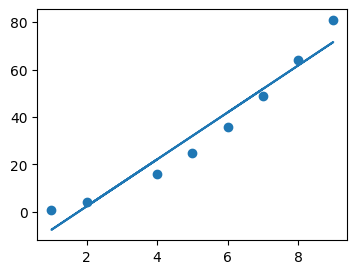

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

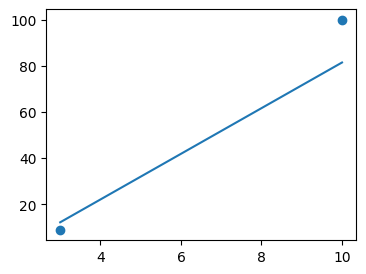

In [57]:
plt.figure(figsize=(4, 3))
plt.scatter(X_test,y_test)
plt.plot(X_test,model.predict(X_test))

>

what are the ways to calculate accuarcy between train, cv and test
- Train RMSE
- Test R^2
- CV (this will be calculated only on train)
- Test RMSE
- Test R^2